# Исследование компьютерных игр

### Введение

В моём распоряжении исторические данные о продажах игр за период с 1980 по 2016 год. <br>
Данные, которые есть об этих играх:
- Название
- Платформа
- Год релиза
- Жанр
- Продажи в Северной Америке
- Продажи в Европе
- Продажи в Японии
- Продажи в других странах
- Оценки пользователей
- Оценки критиков
- Рейтинг ESRB

Цель исследования: Выявить закономерности, определяющие успешность игры, чтобы делать прогнозы для продаж и рекламных кампаний<br>
Для достижения цели, необходимо будет:

- Ознакомиться с информацией, проработать пропуски, и аномальные значения, привести данные к нужному типу
- Исследовать распределение продаж по годам, найти взаимосвязь продаж с оценками, регионами и платформами
- Составить портреты пользователей каждого региона
- Подтвердить или опровернуть гипотезы
- Сделать общий вывод об исследовании

### Знакомство с информацией

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats as st
import numpy as np

In [2]:
try:
    df = pd.read_csv('/Users/janna/Documents/Projects done/games.csv')

except:
    df = pd.read_csv('/datasets/games.csv')


In [3]:
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Информация о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменение названий столбцов

In [5]:
df.columns = df.columns.str.lower()#привела к единому регистру

#### Проверка пропусков

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Проверка дубликатов

In [7]:
df.duplicated().sum()

0

Дубликатов нет

#### Работа с пропусками

Пропуски есть в столбцах год, оценка критиков, оценка пользователей и рейтинг <br>
Вероятно, что год пропущен из-за неполного заполнения данных, человеческого фактора, отсутствия данных.
Количество пропусков занимает 1,6% от общего количества данных, поэтому эти строки можно удалить без сильных искажений<br>


In [8]:
#удаление строк с пропущенным годом, названием и жанром
df = df.dropna(subset=['year_of_release', 'name', 'genre']) 


Рейтинг ESRB действует только в США и Канаде, поэтому пропуски могут исказить данные. Поставлю на них заглушку

In [9]:
df['rating'] = df['rating'].fillna('no_rating')


Пропуски в рейтинге из-за того, что не хватает данных или игра выпущена раньше, чем появилась ESRB. Заполнить пропуски какими-либо средними значениями так же не получится, так как прямой корреляции с какими-то параметрами нет, оставляю

In [11]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В данных об оценке пользователей встречается значение 'tbd', которое, вероятно, обозначает, что данные не определены. Такое значение можно считать как пропуск, так как заполнить каким-либо средним значением будет неверно.



In [12]:
#избавляюсь от tbd
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
print(df['user_score'].unique())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


### Подготовка данных

#### Изменение типов данных

Необходимо изменить тип данных в столбце user_score, так как потребуется расчет с этими значениями<br>
Столбец в годом переделать в формат даты

In [13]:

df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')#изменение типа данных у оценок пользователей

#### Суммарные продажи во всех регионах

In [14]:
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']#складываю продажи во всех регионах

### Исследовательский анализ данных

#### Распределение по годам

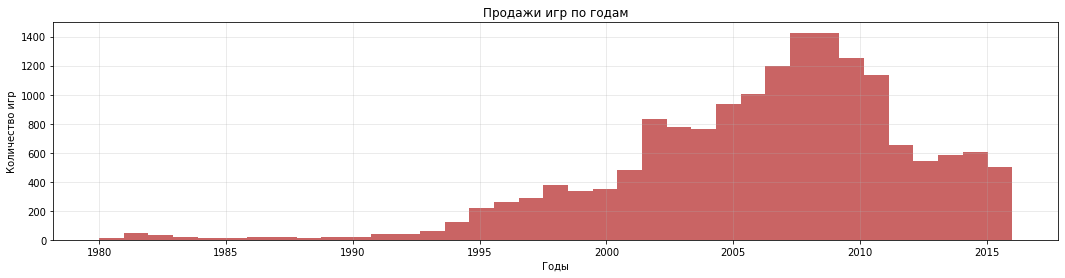

In [16]:
#смотрю распределение выпущенных игр по годам
plt.figure(figsize=(18,4))
plt.hist(x = df['year_of_release'],histtype = 'bar', bins = 37, color='firebrick',alpha=.7)
plt.gca().set(ylabel='Количество игр', xlabel='Годы')
plt.grid(True,alpha=.3)
plt.title('Продажи игр по годам')
plt.show()

Данных об играх до 1995 года мало по сравнению с другими периодами. <br>
После 2000 года начался бурный рост выпускаемых игр, а самый пик был в период 2008-2009 гг

#### Продажи по платформам

In [17]:
df_platform = (
    df.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
.sort_values(by = 'all_sales', ascending = False)
) #сводная по платформам с общими суммами продаж за все годы
df_platform = df_platform.query('all_sales >300') #оставляю только самые крупные платформы
df_platform.columns = ['sum'] #называю столбец
print(df_platform)


              sum
platform         
PS2       1233.56
X360       961.24
PS3        931.34
Wii        891.18
DS         802.78
PS         727.58
PS4        314.14
GBA        312.88


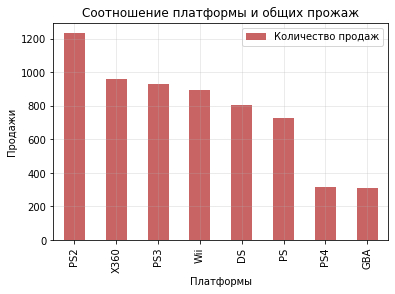

In [18]:
#график для распределения продаж по платформам
df_platform.plot(kind='bar',color='firebrick', alpha=.7, linewidth=20)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Соотношение платформы и общих прожаж', fontdict={'size':12})
plt.legend(['Количество продаж'])
plt.grid(True,alpha=.3)
plt.show()

По графику видно, что с отрывом лидирует PS2, вероятно, эта платформа выпускала больше всего игр и лучше продавалась.

In [19]:
#распределение по годам
df_years = df.pivot_table(index = 'year_of_release', values = 'all_sales', columns = 'platform', aggfunc = 'sum')


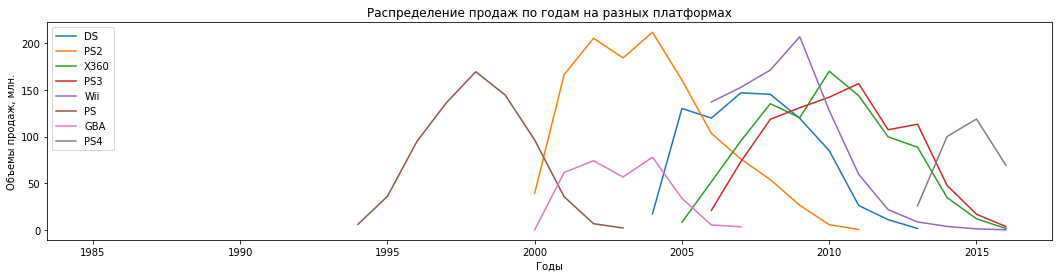

In [20]:
#график по годам для самых продаваемых платформ
plt.figure(figsize=(18,4))
plt.plot(df_years['DS'],label = 'DS')
plt.plot(df_years['PS2'],label = 'PS2')
plt.plot(df_years['X360'], label = 'X360')
plt.plot(df_years['PS3'], label = 'PS3')
plt.plot(df_years['Wii'], label = 'Wii')
plt.plot(df_years['PS'], label = 'PS')
plt.plot(df_years['GBA'], label = 'GBA')
plt.plot(df_years['PS4'], label = 'PS4')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж, млн.')
plt.title('Распределение продаж по годам на разных платформах')
plt.legend(loc = 'upper left')
plt.show()

По графику явно видно, что у каждой платформы похожий цикл роста и спада, который идет на протяжении 5-10 лет. После чего, платформы совсем перестают выпускать новые игры. Единственная платформа, которая пока не дошла до спада - PS4

#### Данные за актуальный период

До 2000 года количество выпускаемых игр было намного ниже. Беру данные с 2000 по 2016 год, потому что после 2000 выходили на рынок новые платформы и был общий рост, поэтому данных должно быть достаточно

In [21]:
df_new = df.query('year_of_release >=2013')
df_new.info() #посмотрела, сколько строк осталось 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


#### Анализ прибыльность платформ


,count,sum
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,303,143.25
X360,186,136.80
WiiU,115,64.63
PC,189,39.43
PSV,358,32.99
Wii,23,13.66


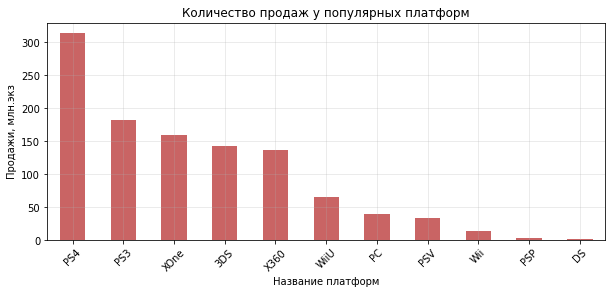

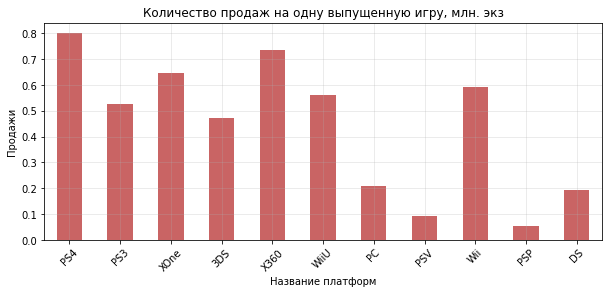

In [22]:
df_new_platform = df_new.pivot_table(index = 'platform', values = 'all_sales', aggfunc = ['count','sum'])
#сводная, чтобы посмотреть количество выпущенных игр и сумму продаж с них
df_new_platform.columns = ['count','sum'] #переименование столбцов
df_new_platform = df_new_platform.sort_values('sum', ascending = False) #сортировка по сумме продаж
display(df_new_platform)
df_new_platform['sales'] = df_new_platform['sum']/df_new_platform['count'] #смотрю продаваемость игр
#display(df_new_platform.sort_values('sales', ascending = False))

df_new_platform['sum'].plot(kind='bar',color='firebrick', alpha=.7, linewidth=20, figsize=(10,4))
plt.ylabel('Продажи, млн.экз')
plt.xlabel('Название платформ')
plt.xticks(rotation= 45)
plt.title('Количество продаж у популярных платформ', fontdict={'size':12})
plt.grid(True,alpha=.3)
plt.show()

df_new_platform['sales'].plot(kind='bar',color='firebrick', alpha=.7, linewidth=20, figsize=(10,4))
plt.ylabel('Продажи')
plt.xlabel('Название платформ')
plt.xticks(rotation= 45)
plt.title('Количество продаж на одну выпущенную игру, млн. экз', fontdict={'size':12})
plt.grid(True,alpha=.3)
plt.show()



В абсолютных лидерах по общему количетсву продаж PS4.<br>
При этом есть наблюдение, что, например, платформа PSV выпустила почти столько же игр, как и PS4, а вот продаж сделала почти в 10 раз меньше. Поэтому посмотрела еще на среднее количество продаж на одну игру.
PS4 по этому показателю всё равно лидирует, а у других платформ есть отличия в продаваемости


#### Ящик с усами

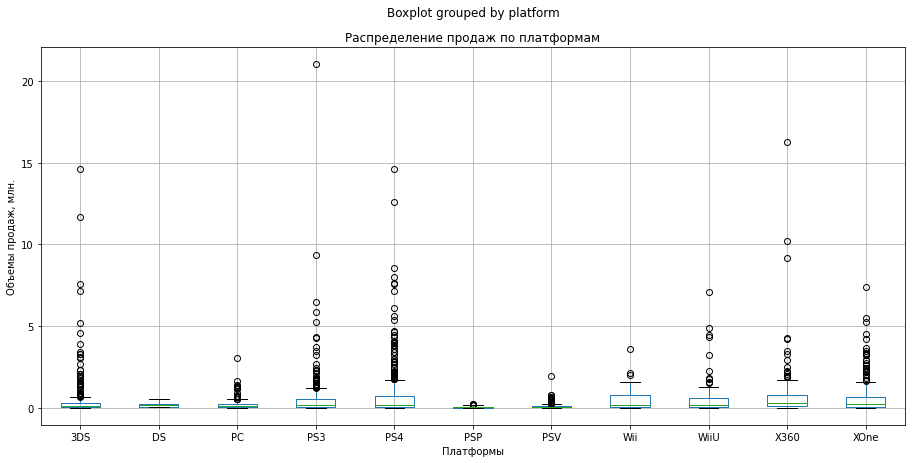

In [24]:
df_new.boxplot(column = 'all_sales',by='platform',figsize = (15,7))
#plt.ylim(0, 9)
plt.xlabel('Платформы')
plt.ylabel('Объемы продаж, млн.')
plt.title('Распределение продаж по платформам')
plt.show()

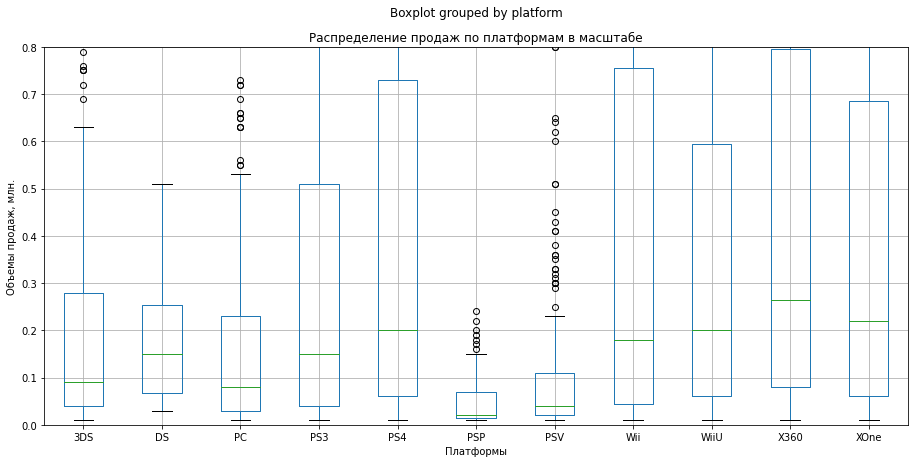

In [25]:
df_new.boxplot(column = 'all_sales',by='platform',figsize = (15,7))
plt.ylim(0, 0.8)
plt.xlabel('Платформы')
plt.ylabel('Объемы продаж, млн.')
plt.title('Распределение продаж по платформам в масштабе')
plt.show()

По графикам видно, что самые высокие медианы продаж у платформ х360, PS4, Wii, Xone - 230-250 тыс.экз. Но при этом у всех этих платформ много выбросов, то есть какие-то выпуски игр давали резкие скачки в продажах.<br>
А, например, у платформы DS медиана тоже не низкая - 150 тыс.экз, но при этом совсем нет выбросов, то есть все игры продавались примерно с одинаковым успехом.

#### Влияние оценок на продажи

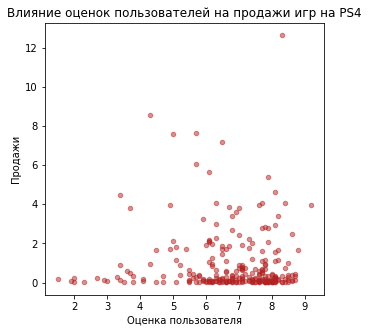

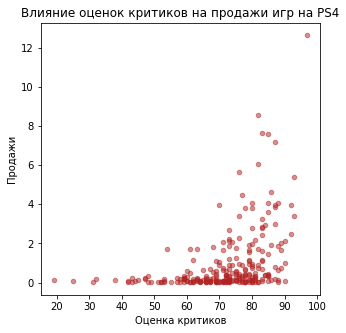

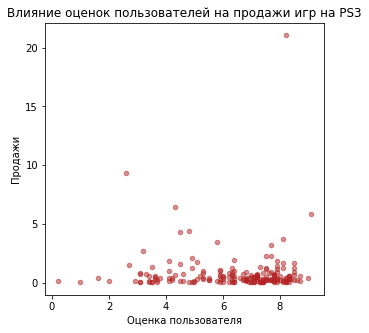

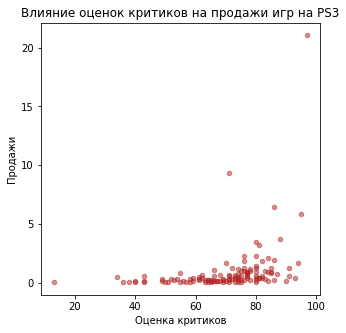

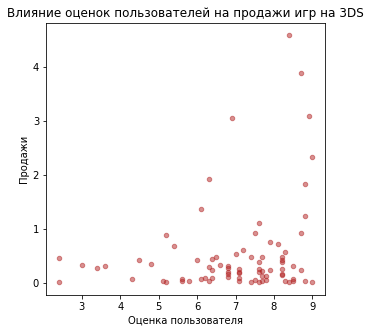

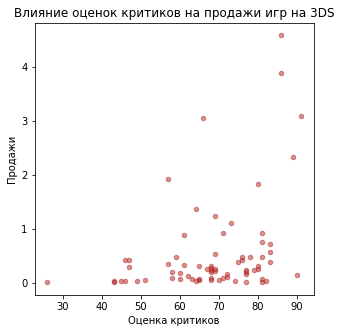

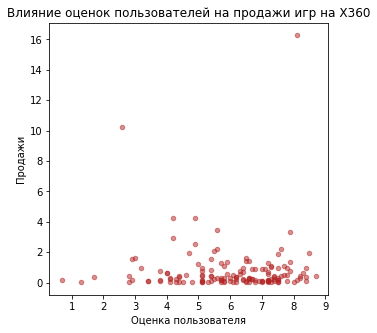

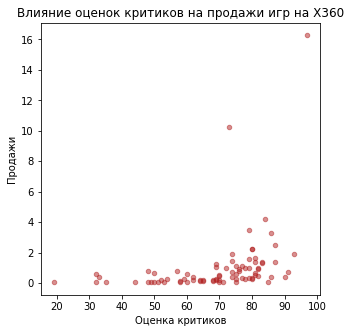

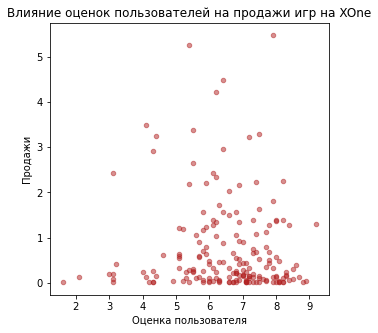

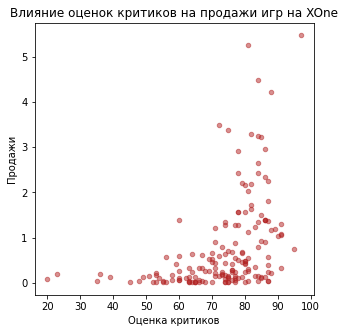

In [28]:
platform_list = ['PS4','PS3','3DS','X360','XOne'] #беру пять самых продаваемых платформ

for platform in platform_list:
    top_platform = df_new.query('platform == @platform')
    top_platform.plot(x = 'user_score', y='all_sales',kind='scatter',color='firebrick',alpha=.5, figsize=(5,5))\
    .set(title=f'Влияние оценок пользователей на продажи игр на {platform}',xlabel='Оценка пользователя', ylabel='Продажи')
    top_platform.plot(x = 'critic_score', y='all_sales',kind='scatter',color='firebrick',alpha=.5, figsize=(5,5))\
    .set(title=f'Влияние оценок критиков на продажи игр на {platform}',xlabel='Оценка критиков', ylabel='Продажи')
    
    plt.show()
    

In [29]:
display(top_platform[['user_score','critic_score','all_sales']].corr()) #расчет корреляции 


,user_score,critic_score,all_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
all_sales,-0.068925,0.416998,1.000000


По выбранным платформам можно наблюдать, что на продажи частично влияют оценки критиков. А вот оценки пользователей с продажами совсем не связаны. 

#### Распределение игр по жанрам

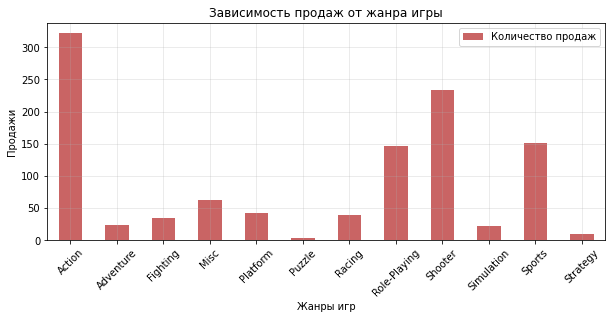

In [30]:
df_genre = df_new.pivot_table(index = 'genre', values = 'all_sales', aggfunc = ['sum'])#сводная для объединения жанров и продажам по ним

df_genre.plot(kind='bar',color='firebrick', alpha=.7, linewidth=20, figsize=(10,4))
plt.ylabel('Продажи')
plt.xlabel('Жанры игр')
plt.xticks(rotation= 45)
plt.title('Зависимость продаж от жанра игры', fontdict={'size':12})
plt.grid(True,alpha=.3)
plt.legend(['Количество продаж'])
plt.show()


На графике явно видно, что пользователи предпочитают играть в экшн-игры и в спортивные игры, они продаются гораздо лучше, а стратегии, приключения и пазлы уже на любителя.

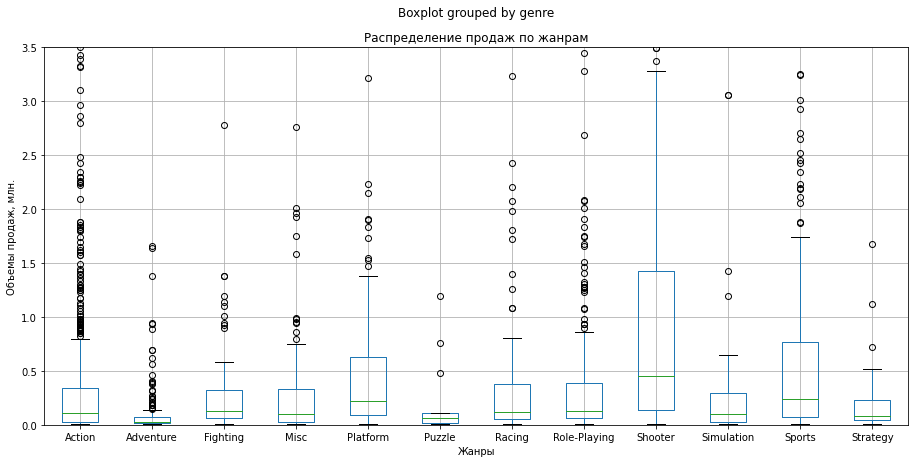

In [31]:
df_new.boxplot(column = 'all_sales', by='genre', figsize = (15,7))
plt.xlabel('Жанры')
plt.ylabel('Объемы продаж, млн.')
plt.title('Распределение продаж по жанрам')
plt.ylim(0,3.5)
plt.show()

На графике видно, что по медианным продажам лидируют шутеры. А у жанра экшн очень много выбросов, при этом медианные прожажи ниже. Вероятно, несколько выпусков игр имели большой успех, но при этом в общей картине продаж это не так весомо

### Портрет пользователя каждого региона

#### Зависимость продаж от региона у популярных платформ

,Европа,Япония,Северная Америка,Другие страны
platform,,,,
PS4,141.09,15.96,108.74,48.35
PS3,67.81,23.35,63.50,26.77
XOne,51.59,0.34,93.12,14.27
3DS,30.96,67.81,38.20,6.28
X360,42.52,0.51,81.66,12.11


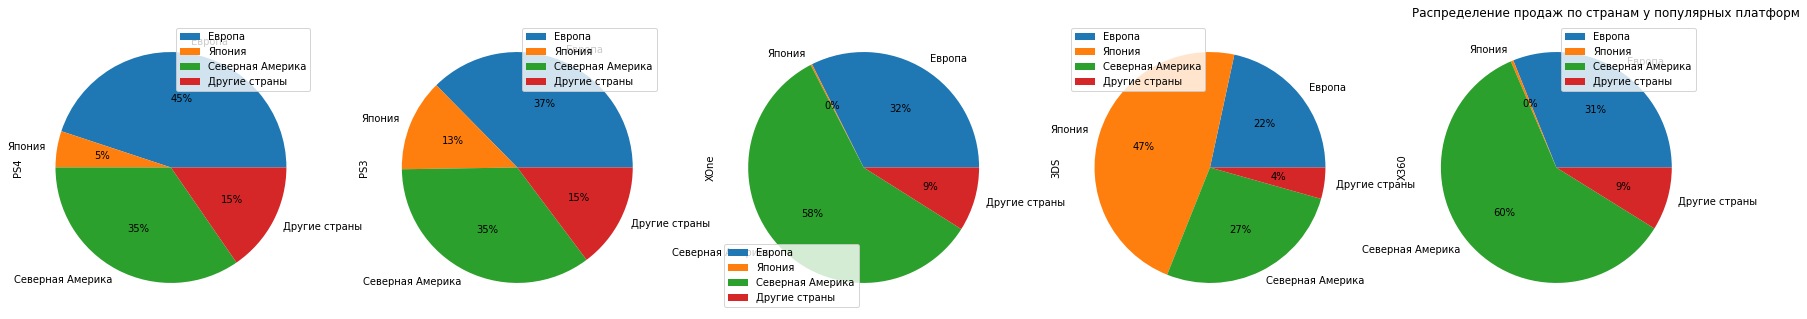

In [32]:
#сводная по странам и платформам с количеством продаж
df_region = df_new.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales','other_sales','all_sales'], aggfunc = 'sum')
df_region = df_region.rename(columns = {'na_sales':'Северная Америка','eu_sales':'Европа','jp_sales':'Япония','other_sales':'Другие страны'})
df_region = df_region.sort_values(by = 'all_sales', ascending= False).head()#беру платформы с самыми большими продажами
df_region = df_region.drop(labels = 'all_sales', axis = 1)#удаляю столбец со всеми продажами
display(df_region)
df_region.T.plot(kind='pie', subplots=True, figsize=(30,100), autopct='%1.0f%%')
plt.title(label= "Распределение продаж по странам у популярных платформ", loc = 'left') 

plt.legend(loc = 'upper right')
plt.show()

На графиках вижно, что XOne и X360 очень популярны в Северной Америке и занимают больше половины всех продаж среди популярных платформ. В Японии наоборот эти платформы менее популярны, а явный лидер там 3DS, что не удивительно, ведь это Японская платформа.

#### Продажи разных жанров в регионах

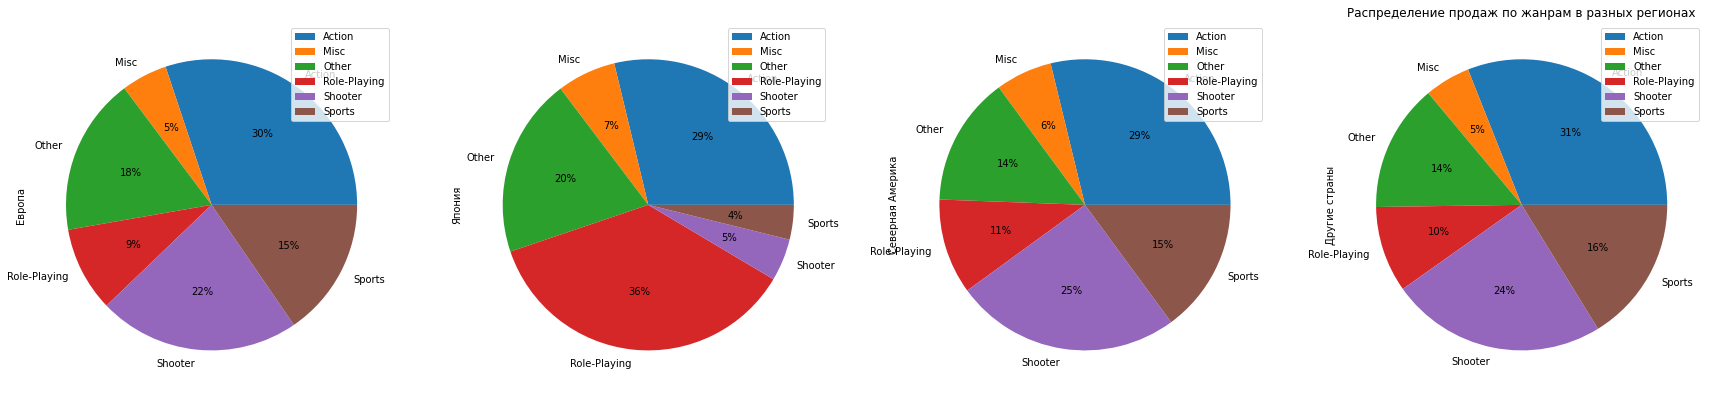

In [33]:
df_region_genre = df_new.pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales','other_sales','all_sales'], aggfunc = 'sum')
df_region_genre = df_region_genre.rename(columns = {'na_sales':'Северная Америка','eu_sales':'Европа','jp_sales':'Япония','other_sales':'Другие страны' })
df_region_genre = df_region_genre.sort_values(by = 'all_sales', ascending = False)
df_region_genre['other'] = ["Action",'Shooter','Sports','Role-Playing','Misc','Other','Other','Other','Other','Other','Other','Other']
df_region_genre = df_region_genre.drop(labels = 'all_sales', axis = 1)
df_region_genre = df_region_genre.groupby('other').sum()
#display(df_region_genre)
df_region_genre.plot(kind='pie', subplots=True, figsize=(30,35), autopct='%1.0f%%')
plt.title("Распределение продаж по жанрам в разных регионах")
plt.show()



Во всех странах одним из масых популярных жанров является экшн. Но при этом в Японии больше любят ролевые игры, а в Европе, Северной Америке и других странах популярны шутеры

#### !Влияние рейтинга ESRB на продажи в разных регионах

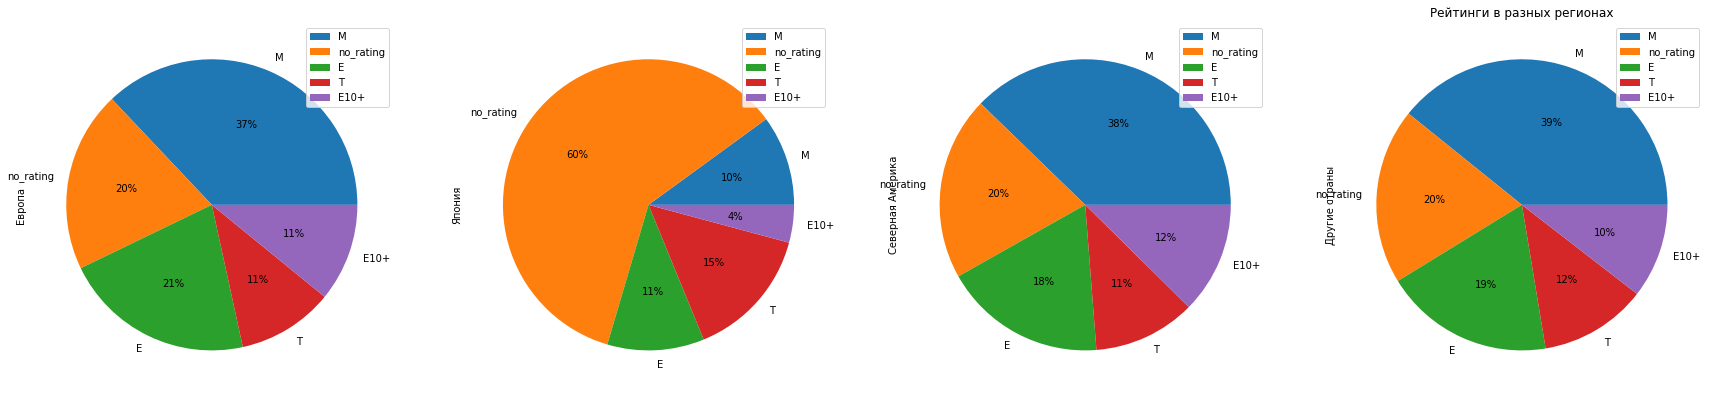

In [35]:
#влияет ли рейтинг на продажи

df_na = df_new.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales','other_sales','all_sales'], aggfunc = 'sum')
df_na = df_na.rename(columns = {'na_sales':'Северная Америка','eu_sales':'Европа','jp_sales':'Япония', 'other_sales': 'Другие страны'})
df_na = df_na.sort_values(by = 'all_sales', ascending = False)
df_na = df_na.drop(labels = 'all_sales', axis = 1)
#display(df_na)
df_na.plot(kind='pie', subplots=True, figsize=(30,35), autopct='%1.0f%%')
plt.title("Рейтинги в разных регионах")
plt.show()

### Проверка гипотез

#### Первая гипотеза
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
Нулевая гипотеза Н0 - средние рейтинги платформ одинаковые<br>
Альтернативная гипотеза Н1 - средние рейтинги платформ разные <br>
alpha = 5%

In [37]:
xbox = df_new.query('platform == "XOne"')
xbox = xbox.dropna(subset=['user_score']) #удаляю пустые значения, так как они мешают расчету
xbox_user_score = xbox['user_score']

PC = df_new.query('platform == "PC"')
PC = PC.dropna(subset=['user_score']) #удаляю пустые значения, так как они мешают расчету
PC_user_score = PC['user_score']

alpha = .05

results = st.ttest_ind(xbox_user_score, PC_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print('Средний пользовательский рейтинг платформы PC', PC_user_score.mean())
print('Средний пользовательский рейтинг платформы Xbox',xbox_user_score.mean())


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг платформы PC 6.2696774193548395
Средний пользовательский рейтинг платформы Xbox 6.521428571428572


Вероятность, что рейтинги одинаковые выше порогового значения, а значит, средние рейтинги могут быть схожи

#### Вторая гипотеза
Средние пользовательские рейтинги жанров Action и Sports разные.<br>
Нулевая гипотеза Н0 - средние пользовательские рейтинги разные<br>
Альтернативная гипотеза Н1 - средние пользовательские рейтинги одинаковые<br>

In [38]:
action = df_new.query('genre == "Action"')
action = action.dropna(subset=['user_score']) #удаляю пустые значения, так как они мешают расчету
action_user_score = action['user_score']

sports = df_new.query('genre == "Sports"')
sports = sports.dropna(subset=['user_score']) #удаляю пустые значения, так как они мешают расчету
sports_user_score = sports['user_score']

alpha = .05

results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Средняя оценка пользователей у жанра экшн', action_user_score.mean())
print('Средняя оценка пользователей у жанра спорт',sports_user_score.mean())
    

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средняя оценка пользователей у жанра экшн 6.837532133676092
Средняя оценка пользователей у жанра спорт 5.238124999999999


Вероятность, что рейтинги разные слишком мала, поэтому допускаем, что они могут совпадать

### Общий вывод

Общие итоги исследования:


- Данные были за период с 1980 по 2016 год. Для анализа актуальных данных был выбран интервал с 2013 по 2016 год, как наоболее релевантный для анализа
- Пропущенные значения не было возможности заменить какими-либо средними, потому что они могли исказить анализ. Поэтому строки, где отсутствует год, название и жанр, были удалены, остальные данные с пропусками остались без изменений
- Самый пик выпуска игр пришелся на период с 2005 по 2010 год
- У каждой платформы есть постепенный рост и спад продаж, он длится 5-10 лет.
- Оценки критиков могут напрямую влиять на количество продаж, чем выше оценка, тем лучше продажи
- Оценки покупателей при этом особой роли не играют
- Самые популярные жанры экшн и шутеры
- В Северной Америке лучше всего продаются игры самых популярных платформ

Рекомендации:

Рекламный бюджет следует потратить на одну из платфом х360, PS4, Wii - у них самые высокие медианные продажи. 
Для Европы, Северной Америки и других стран надо выбирать шутеры и экшены, для Японии брать ролевые игры. Половина продаваемых игр идет с рейтингом М по шкале ESRB, поэтому можно акцентировать на нем.
Стоит обращать внимание на оценки критиков, так как они могут частично повлиять на увеличение продаж. А вот оценки пользователей влияния не имеют.
